## Import libraries and data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# define path
path = r'/Users/Cel/Documents/Data Analytics/6. Maine Fisheries Landings/10:23 Maine Fisheries Landings'

In [4]:
lobster = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'lobster_clean.csv'), index_col = False)

In [5]:
lobster.head(10)

,Unnamed: 0.1,Unnamed: 0,year,species,port,county,weight_type,weight,value,number_harvesters,price_per_lb
0,182,182,2008,Lobster American,Addison,Washington,Live Pounds,874072.35,2811848.728,80,3.216952
1,183,183,2008,Lobster American,Bailey Island,Cumberland,Live Pounds,1300961.05,4380685.491,100,3.367269
2,184,184,2008,Lobster American,Bar Harbor,Hancock,Live Pounds,749213.48,2761140.098,71,3.685385
3,185,185,2008,Lobster American,Bass Harbor,Hancock,Live Pounds,860515.00,3237508.820,89,3.762292
4,186,186,2008,Lobster American,Beals,Washington,Live Pounds,1463538.05,4777283.831,173,3.264202
5,187,187,2008,Lobster American,Birch Harbor,Hancock,Live Pounds,469693.50,1686542.550,20,3.590730
6,188,188,2008,Lobster American,Blue Hill,Hancock,Live Pounds,501952.97,1871689.247,58,3.728814
7,189,189,2008,Lobster American,Boothbay Harbor,Lincoln,Live Pounds,1167021.10,4076446.840,144,3.493036
8,190,190,2008,Lobster American,Bremen,Lincoln,Live Pounds,714036.20,2313529.645,67,3.240073
9,191,191,2008,Lobster American,Brooksville,Hancock,Live Pounds,16853.20,66952.768,9,3.972704


In [6]:
# remove qualitative ata
lobster_quan = lobster.drop(columns = ['Unnamed: 0','Unnamed: 0.1','species','port','county','weight_type'])

In [7]:
lobster_quan

,year,weight,value,number_harvesters,price_per_lb
0,2008,874072.35,2.811849e+06,80,3.216952
1,2008,1300961.05,4.380685e+06,100,3.367269
2,2008,749213.48,2.761140e+06,71,3.685385
3,2008,860515.00,3.237509e+06,89,3.762292
4,2008,1463538.05,4.777284e+06,173,3.264202
...,...,...,...,...,...
1109,2022,223031.45,9.568708e+05,17,4.290295
1110,2022,6960663.70,3.023618e+07,188,4.343864
1111,2022,24907.00,1.156994e+05,6,4.645256
1112,2022,1818154.05,6.541451e+06,57,3.597853


In [8]:
# standardize data
scaler = StandardScaler()
lobster_array = scaler.fit_transform(lobster_quan)

In [9]:
lobster_array

array([[-1.6237917 , -0.24618248, -0.30778835,  0.14617377, -0.74092005],
       [-1.6237917 , -0.06427743, -0.13579534,  0.37280923, -0.59501983],
       [-1.6237917 , -0.29938712, -0.31334758,  0.04418781, -0.2862505 ],
       ...,
       [ 1.69791021, -0.6080273 , -0.60336967, -0.69237744,  0.64541796],
       [ 1.69791021,  0.15610792,  0.10109141, -0.11445701, -0.37121037],
       [ 1.69791021, -0.2179977 , -0.14836611, -0.47707375,  0.54061447]])

In [10]:
columns = ['year', 'weight', 'value', 'number_harvesters', 'price_per_lb']
lobster_scaled = pd.DataFrame(data = lobster_array,
                  columns = columns)
lobster_scaled.head()

,year,weight,value,number_harvesters,price_per_lb
0,-1.623792,-0.246182,-0.307788,0.146174,-0.740920
1,-1.623792,-0.064277,-0.135795,0.372809,-0.595020
2,-1.623792,-0.299387,-0.313348,0.044188,-0.286250
3,-1.623792,-0.251960,-0.261123,0.248160,-0.211603
4,-1.623792,0.005000,-0.092316,1.200029,-0.695058


## Elbow technique

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(lobster_quan).score(lobster_quan) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/Cel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Cel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Cel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/Cel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

[-9.882220767342058e+16,
 -3.071043887790315e+16,
 -1.49698279138739e+16,
 -9107883162399412.0,
 -6273224479207472.0,
 -4348782605225588.0,
 -3238635472747871.0,
 -2598979306704783.5,
 -2057993513079106.2]

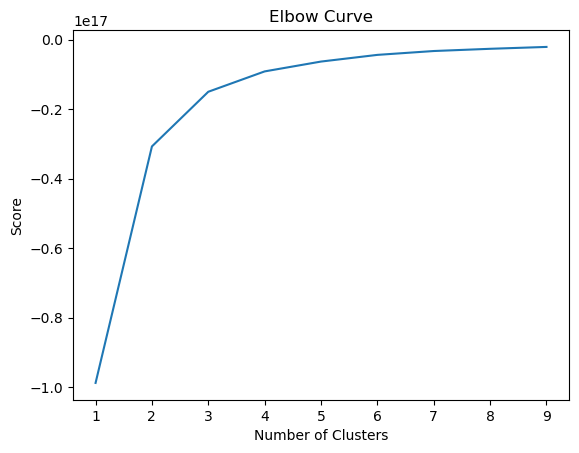

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Optimal amount of clusters is 3.

## k-means clustering

In [14]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [15]:
# Fit the k-means object to the data.

kmeans.fit(lobster_scaled)

/Users/Cel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [16]:
# create 'clusters' column in scaled df
lobster_scaled['clusters'] = kmeans.fit_predict(lobster_scaled)

/Users/Cel/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
# add 'clusters' column to original df
lobster_quan['clusters'] = lobster_scaled['clusters']

In [17]:
lobster_scaled.head()

,year,weight,value,number_harvesters,price_per_lb,clusters
0,-1.623792,-0.246182,-0.307788,0.146174,-0.740920,0
1,-1.623792,-0.064277,-0.135795,0.372809,-0.595020,0
2,-1.623792,-0.299387,-0.313348,0.044188,-0.286250,0
3,-1.623792,-0.251960,-0.261123,0.248160,-0.211603,0
4,-1.623792,0.005000,-0.092316,1.200029,-0.695058,0


In [29]:
lobster_quan.head()

,year,weight,value,number_harvesters,price_per_lb,clusters
0,2008,874072.35,2811848.728,80,3.216952,0
1,2008,1300961.05,4380685.491,100,3.367269,0
2,2008,749213.48,2761140.098,71,3.685385,0
3,2008,860515.00,3237508.820,89,3.762292,0
4,2008,1463538.05,4777283.831,173,3.264202,0


In [18]:
lobster_scaled['clusters'].value_counts()

clusters
0    544
2    520
1     50
Name: count, dtype: int64

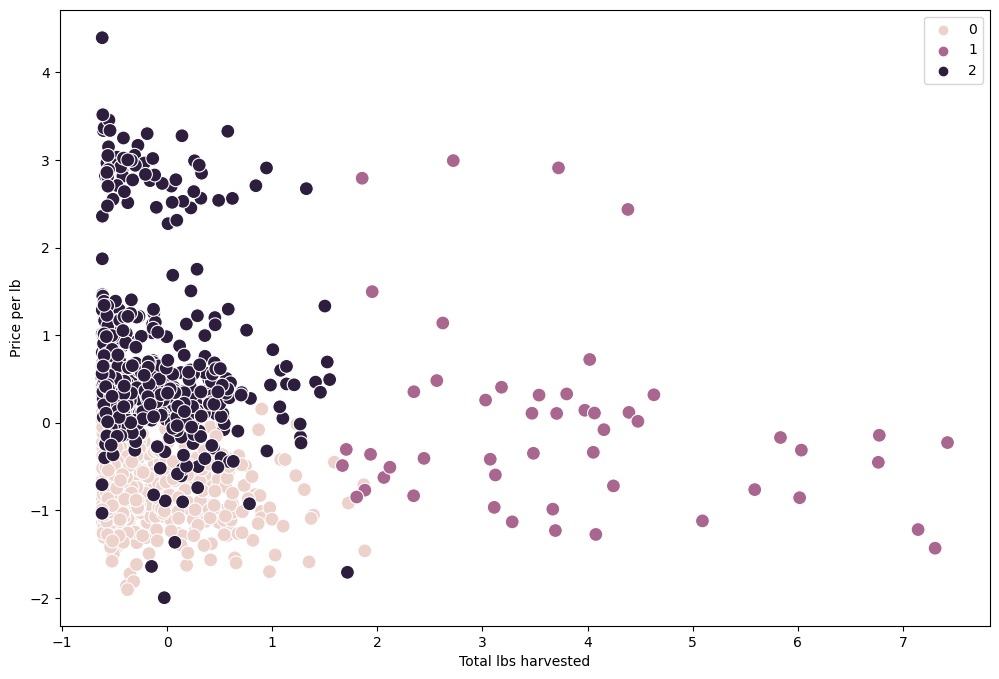

In [21]:
# SCALED - Plot the clusters for the "weight" and "price per lb" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=lobster_scaled['weight'], y=lobster_scaled['price_per_lb'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total lbs harvested') # Label x-axis.
plt.ylabel('Price per lb') # Label y-axis.
plt.show()

The clusters seem to make the most sense in the third plot (total lbs harvested vs total value). The pink cluster represents the majority of catches, which are relatively low in weight and in value. The next two clusters increase in value and weight (the third being the highest in value and weight, but least numerous). The first graph plotting weight vs price per pound tells us that the amount of lobster harvested doesn't really affect the value - which goes against our original hypothesis. 

In [24]:
# new column to categorize clusters by color
lobster_scaled.loc[lobster_scaled['clusters'] == 2, 'cluster'] = 'dark purple'
lobster_scaled.loc[lobster_scaled['clusters'] == 1, 'cluster'] = 'purple'
lobster_scaled.loc[lobster_scaled['clusters'] == 0, 'cluster'] = 'pink'

In [25]:
# summary statistics by cluster
lobster_scaled.groupby('cluster').agg({'year':['count','mean', 'median'], 
                    'weight':['mean', 'median'], 
                    'value':['mean', 'median'],
                    'number_harvesters':['mean', 'median'],
                    'price_per_lb': ['mean', 'median']})

year                        weight               value            \
            count      mean    median      mean    median      mean    median   
cluster                                                                         
dark purple   520  0.857447  0.748853 -0.161730 -0.327827 -0.079994 -0.261913   
pink          544 -0.840470 -0.911998 -0.195338 -0.397762 -0.268804 -0.430613   
purple         50  0.226871  0.274324  3.807272  3.681128  3.756524  3.684848   

            number_harvesters           price_per_lb            
                         mean    median         mean    median  
cluster                                                         
dark purple         -0.193126 -0.329761     0.689178  0.422398  
pink                -0.135704 -0.363756    -0.654294 -0.659379  
purple               3.484967  3.517376    -0.048730 -0.309883

The original hypothesis was that price per pound would decrease as the total weight harvested increases. The regression analysis from the previous exercise suggested that the negative linear relationship was quite weak. However, the cluster analysis revealed 3 groups with different mean price per pounds. 

In [30]:
# exporting scaled data
lobster_scaled.to_csv(r'/Users/Cel/Documents/Data Analytics/6. Maine Fisheries Landings/10:23 Maine Fisheries Landings/02 Data/Prepared Data/lobster_scaled_cluster.csv')

In [31]:
# exporting original data with cluster column
lobster_quan.to_csv(r'/Users/Cel/Documents/Data Analytics/6. Maine Fisheries Landings/10:23 Maine Fisheries Landings/02 Data/Prepared Data/lobster_cluster.csv')